# Figure 2. Dependence of within-trial color reports.

### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from data import load_data
from utils import get_relative_dist_df, get_kl_df
from vis import DISC_EDGES, FREE_COLOR, RAND_COLOR, plot_error_by_set_size, plot_error_by_response, plot_error_by_response_stacked, plot_error_by_response_ecdf, set_axes_labels, set_export_style, plot_paired_error_by_set_size, plot_paired_error_by_response, set_axes_aspect, plot_relative_distance_scatter, paired_hist, set_axes_rad, plot_bootstrapped_kl, plot_paired_relative_distance

save_fig = False

### Load data

In [5]:
### DATASET LOADING ###
modality = 'color'
set_size = 6 # for response plotting

# continuous datasets
df_free_cont = load_data(modality=modality, condition='free', dataset='continuous')
df_free_cont_6 = df_free_cont[df_free_cont.set_size == set_size].reset_index(drop=True)

df_rand_cont = load_data(modality=modality, condition='rand', dataset='continuous')
df_rand_cont_6 = df_rand_cont[df_rand_cont.set_size == set_size].reset_index(drop=True)

# discrete datasets
df_free_disc = load_data(modality=modality, condition='free', dataset='discrete')
df_free_disc_6 = df_free_disc[df_free_disc.set_size == set_size].reset_index(drop=True)

df_rand_disc = load_data(modality=modality, condition='rand', dataset='discrete')
df_rand_disc_6 = df_rand_disc[df_rand_disc.set_size == set_size].reset_index(drop=True)

### Figure 2B. Example joint distribution of reported stimulus values.

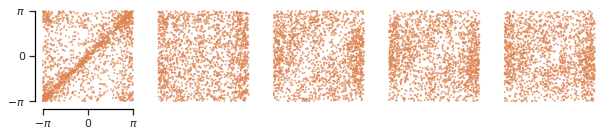

In [6]:
# continuous joint distributions- free

fig, axes = plot_relative_distance_scatter(df_free_cont_6, size=15, color=FREE_COLOR)

for ax in axes[1:]:
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xlabel('')
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

axes[0].set_xlabel('reported (rad)')
axes[0].set_ylabel('first reported (rad)')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['left'].set_position(('outward',5))
axes[0].spines['left'].set_bounds(-np.pi, np.pi)
axes[0].spines['bottom'].set_position(('outward',5))
axes[0].spines['bottom'].set_bounds(-np.pi, np.pi)

set_axes_aspect(fig, axes)
set_export_style(fig, axes, remove_ticklabels=False, figsize=(10, 3))

if save_fig:
    plt.savefig('../figures/fig_02-01_cont_joint_dists.png', bbox_inches='tight', dpi=800)

plt.show()

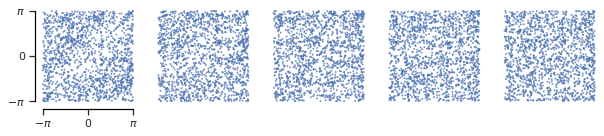

In [7]:
# continuous joint distributions- rand

fig, axes = plot_relative_distance_scatter(df_rand_cont_6, size=15, color=RAND_COLOR)

for ax in axes[1:]:
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xlabel('')
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

axes[0].set_xlabel('reported (rad)')
axes[0].set_ylabel('first reported (rad)')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['left'].set_position(('outward',5))
axes[0].spines['left'].set_bounds(-np.pi, np.pi)
axes[0].spines['bottom'].set_position(('outward',5))
axes[0].spines['bottom'].set_bounds(-np.pi, np.pi)

set_axes_aspect(fig, axes)
set_export_style(fig, axes, remove_ticklabels=False, figsize=(10, 3))

if save_fig:
    plt.savefig('../figures/fig_02-01_disc_joint_dists.png', bbox_inches='tight', dpi=800)

plt.show()

### Figure 2C. Distribution of relative distances for the continuous task (set size 6).

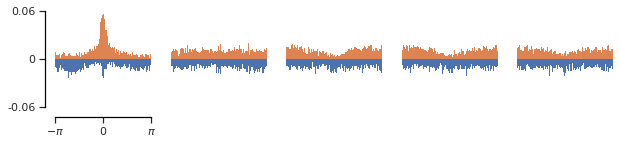

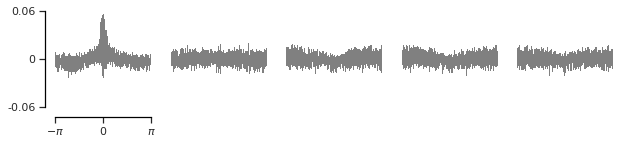

In [8]:
# continuous relative dists
data_upper = df_free_cont_6
data_lower = df_rand_cont_6

fig, axes = plot_paired_relative_distance(data_upper, data_lower)

for ax in axes[1:]:
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['left'].set_position(('outward',10))
axes[0].spines['bottom'].set_position(('outward',10))
axes[0].set_yticks([-0.06, 0, 0.06])
axes[0].set_yticklabels([-0.06, 0, 0.06])

set_axes_aspect(fig, axes)
set_export_style(fig, axes, remove_ticklabels=False, figsize=(10, 3))

if save_fig:
    plt.savefig('../figures/fig_02-03_relative_dists_cont.png', bbox_inches='tight', dpi=800)

plt.show()

# export greyscale for comparison to orient
fig.clear()
gray = (0.5, 0.5, 0.5)

fig, axes = plot_paired_relative_distance(data_upper, data_lower, color=gray)

for ax in axes[1:]:
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['left'].set_position(('outward',10))
axes[0].spines['bottom'].set_position(('outward',10))
axes[0].set_yticks([-0.06, 0, 0.06])
axes[0].set_yticklabels([-0.06, 0, 0.06])

set_axes_aspect(fig, axes)
set_export_style(fig, axes, remove_ticklabels=False, figsize=(10, 3))

if save_fig:
    plt.savefig('../figures/fig_02-03_relative_dists_cont_gray.pdf', bbox_inches='tight', dpi=800)

plt.show()

### Figure 2D. Distribution of relative distances for the discrete task (set size 6).

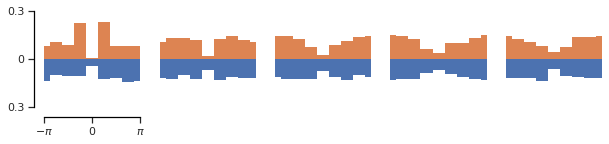

In [5]:
# discrete relative dists
data_upper = df_free_disc_6
data_lower = df_rand_disc_6

fig, axes = plot_paired_relative_distance(data_upper, data_lower, bins=DISC_EDGES, split_pi=True, histtype='stepfilled')

for ax in axes[1:]:
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['left'].set_position(('outward',10))
axes[0].spines['bottom'].set_position(('outward',10))
axes[0].set_yticks([-0.3, 0, 0.3])
axes[0].set_yticklabels([0.3, 0, 0.3])

set_axes_aspect(fig, axes)
set_export_style(fig, axes, remove_ticklabels=False, figsize=(10, 3))

if save_fig:
    plt.savefig('../figures/fig_02-02_relative_dists_disc.png', bbox_inches='tight', dpi=800)

### KL divergence estimation

In [7]:
# get all unique subIDs
# note that the same participants did both conditions for the discrete task

free_disc_subs = np.sort(df_free_disc.subject.unique())
rand_disc_subs = np.sort(df_rand_disc.subject.unique())
print(f'free discrete subs: \n {free_disc_subs}')
print(f'rand discrete subs: \n {rand_disc_subs}')

free_cont_subs = np.sort(df_free_cont.subject.unique())
rand_cont_subs = np.sort(df_rand_cont.subject.unique())
print(f'free continuous subs: \n {free_cont_subs}')
print(f'rand continuous subs: \n {rand_cont_subs}')

free discrete subs: 
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
rand discrete subs: 
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
free continuous subs: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
rand continuous subs: 
 [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [8]:
# compute bootstrapped KL estimates by sub/condition (discrete)
# this takes several minutes 

n_iters = 1000
kl_bins = 8
sample_bins = 8
empirical = True

kl_df_disc = None

for sub in free_disc_subs:
        data_free = df_free_disc_6[df_free_disc_6.subject == sub]
        data_rand = df_rand_disc_6[df_rand_disc_6.subject == sub]

        kl_df_free = get_kl_df(data_free, 
                               n_iters=n_iters, 
                               condition='free', 
                               kl_bins=kl_bins, 
                               empirical=empirical)
        kl_df_base_free = get_kl_df(data_free, 
                                    n_iters=n_iters, 
                                    uniform=True, 
                                    sample_bins=sample_bins, 
                                    condition='baseline_free',
                                    kl_bins=kl_bins, 
                                    empirical=empirical)
    
        kl_df_rand = get_kl_df(data_rand, 
                               n_iters=n_iters, 
                               condition='rand', 
                               kl_bins=kl_bins,
                               empirical=empirical)
        kl_df_base_rand = get_kl_df(data_rand, 
                                    n_iters=n_iters, 
                                    uniform=True, 
                                    sample_bins=sample_bins, 
                                    condition='baseline_rand',
                                    kl_bins=kl_bins, 
                                    empirical=empirical)

        kl_df_sub = pd.concat([kl_df_free, kl_df_base_free, kl_df_rand, kl_df_base_rand])
        kl_df_sub['subject'] = sub
        
        kl_df_disc = kl_df_sub if kl_df_disc is None else pd.concat([kl_df_disc, kl_df_sub])

In [10]:
# compute bootstrapped KL estimates by sub/condition (continuous)
# this takes several minutes 

n_iters = 1000
kl_bins = 36
sample_bins = 360
empirical = True

kl_df_cont = None

for sub in free_cont_subs:
        data_free = df_free_cont_6[df_free_cont_6.subject == sub]
        
        kl_df_free = get_kl_df(data_free, 
                               n_iters=n_iters, 
                               condition='free', 
                               kl_bins=kl_bins, 
                               empirical=empirical)
        kl_df_base_free = get_kl_df(data_free, 
                                    n_iters=n_iters, 
                                    uniform=True, 
                                    sample_bins=sample_bins, 
                                    condition='baseline_free',
                                    kl_bins=kl_bins, 
                                    empirical=empirical)

        kl_df_sub = pd.concat([kl_df_free, kl_df_base_free])
        kl_df_sub['subject'] = sub
        
        kl_df_cont = kl_df_sub if kl_df_cont is None else pd.concat([kl_df_cont, kl_df_sub])

for sub in rand_cont_subs:
        data_rand = df_rand_cont_6[df_rand_cont_6.subject == sub]
        kl_df_rand = get_kl_df(data_rand, 
                               n_iters=n_iters, 
                               condition='rand', 
                               kl_bins=kl_bins,
                               empirical=empirical)
        kl_df_base_rand = get_kl_df(data_rand, 
                                    n_iters=n_iters,
                                    uniform=True, 
                                    sample_bins=sample_bins, 
                                    condition='baseline_rand',
                                    kl_bins=kl_bins, 
                                    empirical=empirical)

        kl_df_sub = pd.concat([kl_df_rand, kl_df_base_rand])
        kl_df_sub['subject'] = sub
        
        kl_df_cont = pd.concat([kl_df_cont, kl_df_sub])

### Figure 2C-D (lower). KL divergence from relative dist distributions to uniform

In [11]:
def plot_bootstrapped_KL_by_sub(kl_df, color):
    
    medians = kl_df.groupby(['response', 'condition', 'subject']).samples.median().reset_index()
    ax = sns.stripplot(x='response', y='samples', hue='condition', 
                       data=medians, dodge=True, palette=color,
                       hue_order=['free', 'baseline_free', 'rand', 'baseline_rand'])
    fig = plt.gcf()
    ax.get_legend().remove()

    for cat, response in enumerate(np.sort(medians.response.unique())):
        y0 = medians[(medians.response == response) & (medians.condition == 'free')].samples
        y1 = medians[(medians.response == response) & (medians.condition == 'baseline_free')].samples
        y2 = medians[(medians.response == response) & (medians.condition == 'rand')].samples
        y3 = medians[(medians.response == response) & (medians.condition == 'baseline_rand')].samples

        x0 = cat - 0.3
        x1 = cat - 0.1
        x2 = cat + 0.1
        x3 = cat + 0.3

        plt.plot([x0, x1], [y0, y1], color=(0.5, 0.5, 0.5), linewidth=0.5)
        plt.plot([x2, x3], [y2, y3], color=(0.5, 0.5, 0.5), linewidth=0.5)
    
    return fig, ax

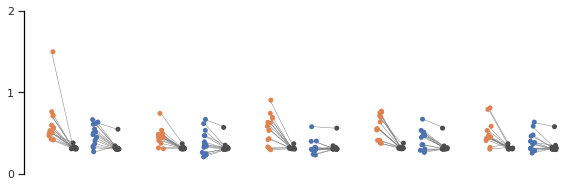

In [36]:
# plot kl medians by subject and condition (discrete)
color = [FREE_COLOR, (0.3, 0.3, 0.3), RAND_COLOR, (0.3, 0.3, 0.3)]
fig, ax = plot_bootstrapped_KL_by_sub(kl_df_disc, color)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylim([0, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticks([])

set_export_style(fig, [ax], remove_ticklabels=False, figsize=(10, 3))

if save_fig:
    fig.savefig('../figures/fig_02-04_kl_bootstrap_disc.png', bbox_inches='tight', dpi=800)

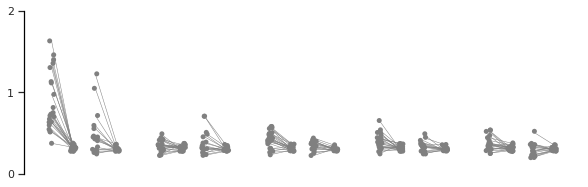

In [35]:
# plot kl medians by subject and condition (continuous)
color = [FREE_COLOR, (0.3, 0.3, 0.3), RAND_COLOR, (0.3, 0.3, 0.3)]
fig, ax = plot_bootstrapped_KL_by_sub(kl_df_cont, color)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylim([0, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticks([])

set_export_style(fig, [ax], remove_ticklabels=False, figsize=(10, 3))

if save_fig:
    fig.savefig('../figures/fig_02-05_kl_bootstrap_cont.png', bbox_inches='tight', dpi=800)

# export greyscale for comparison to orient
fig.clear()
gray = (0.5, 0.5, 0.5)
color = [gray]*4

fig, ax = plot_bootstrapped_KL_by_sub(kl_df_cont, color)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylim([0, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticks([])

set_export_style(fig, [ax], remove_ticklabels=False, figsize=(10, 3))

if save_fig:
    fig.savefig('../figures/fig_02-05_kl_bootstrap_cont_gray.pdf', bbox_inches='tight', dpi=800)